## Completion of SEIR Project

At this point, you should have a working method of bringing your observations of deaths into agreement with your model. Broadly speaking, this software will:

* Import data on the deaths per week and the populations of each state in the US.
* Run an SEIRD model and provide comparisons between model output and data at the appropriate dates. This comparison results in sum square error or SSE for the run.
* Use Powell's method followed by the simplex method in order to minimize the SSE for some set of parameters that consists of the 7 coefficients describing a sixth order polynomial approximation of $\beta(t)$ and a scalar valued death rate. 
* This should be done for each state and the optimal set of coefficients saved to a file.

Going forward, it may be helpful to acquire additional data, or compute additional information. So ideas are:

* The $R_o$ is generally easier to think about than the $\beta(t)$. It is just the product $\beta(t) \gamma$ and tells you the number of cases resulting from a case. If it is less than 1 the number of cases is decreasing.
* The initial weeks of the infection probably reveal an $R_o$ that reflects what happens when people are taking no precautions to reduce the spread. Capture this data.
* $1 - \frac{1}{R_o}$ is the herd immunity threshold. Beyond this point of infection or vaccination or infection in the population, we expect the number of new cases to decline to zero. Find this using the $R_o$ that you think corresponds to pre-pandemic levels of interaction between people.
* It might be interesting to collect the so-called 'excess deaths' and compare them to the observed deaths as a basic check on under/over reporting.
* It's fairly easy to get data on vaccinations too.

To complete the analysis, the following additional need to be completed and questions answered:

1. Write code to create a `pandas` data frame containing relevant information from your simulations. This is going to be simulation output, as well as some of the processed data that is cited above.
2. Plot several fields from your simulation results using `geopandas`. This will require you to merge your data frame with one containing the geometric information of each state. Example code appears below.
3. Identify three states that you believe are outliers in terms of the dynamics.
4. Speculate on the reasons some states are outliers. Provide support in terms of data.
5. Based on your speculations in the previous problem, provide a numerical estimate of the uncertainty in key parameters using MCMC.
6. State 3 conclusions you can reach from completing this exercise. Base at least one on the idea that:
$$f_v = \frac{f_h-f_i}{1-f_i}$$
where $f_v$ is the fraction requiring vaccination, $f_i$ is the fraction that has been infected, and $f_h$ is the fraction required to reach heard immunity.


### Data Visualization
For the purpose of comparing states, it is convenient to create a map of some sort. The code below does that with a simple function I have written.

In [20]:
import geopandas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# State boundary geometries
states = geopandas.read_file("gz_2010_us_040_00_500k.json")
data =  geopandas.read_file("gz_2010_us_040_00_500k.json")

deaths = pd.read_pickle("death_file.pkl")
data = pd.read_pickle("data_file.pkl")
ro= pd.read_pickle('ro_file.pkl')
# Move AK and HI to better places for plotting
m = states.NAME == "Alaska"
states[m] = states[m].set_geometry(states[m].scale(.3,.3,0))
states[m] = states[m].set_geometry(states[m].translate(-70,-35))

m = states.NAME == "Hawaii"
states[m] = states[m].set_geometry(states[m].translate(54,5))

# Get my COVID results
# cd = pandas.read_pickle("COVID_Results_frame.bz2")
# If the index is the name of the place we can join tables on that
# cd.index.rename("NAME",inplace=True)

# Join geometry frame with my frame into combined data frame 
cdf = states.merge(cd,on="NAME")
temp = pd.concat([cdf,deaths],    axis=0,
    keys="NAME",
    copy=True
               )

In [21]:
print(deaths)
print(ro)
print(data)

      Name  Deaths
0  Montana  1509.0
      Name    Ro_max
0  Montana  0.306365
      Name        C1        C2        C3        C4        C5        C6  \
0  Montana  0.094352  0.072903 -0.045917  0.137966  0.482495 -0.140771   

         C7  Death_rate  
0 -0.154467    0.001535  


In [2]:

def plot_field(df,name,bmin,bmax,nbins,colormap="viridis",percent=False):
    if percent:
        new_name = name + " (%)"
        df[new_name] = df[name] * 100
    else:
        new_name = name
        
    d_bins = np.linspace(bmin,bmax,nbins)
    cls_kwds = dict(bins=d_bins)
    
    # Plotting:
    fig,ax = plt.subplots(figsize=(15,10))

    df.plot(new_name,ax=ax,legend=True,\
                  cmap=colormap,scheme="User_Defined",\
            classification_kwds = cls_kwds,\
           legend_kwds = {'loc':'lower right',\
                         'title':new_name});
    plt.xlim([-125,-65])
    plt.ylim([22,50])
    plt.tight_layout()
    plt.title(new_name);
    
# Example, lets' compare deaths to excess deaths. No model output, I don't want to spoil your surprise
cdf["Deaths per 100,000"] = cdf["DEATHS"] / cdf["POPULATION"] * 100000
plot_field(cdf,"Deaths per 100,000",50,220,5,colormap="Reds",percent=False)
cdf["Excess Deaths per 100,000"] = cdf["Excess_Deaths"] / cdf["Population"] * 100000
plot_field(cdf,"Excess Deaths per 100,000",50,220,5,colormap="Reds",percent=False)


KeyError: 'DEATHS'

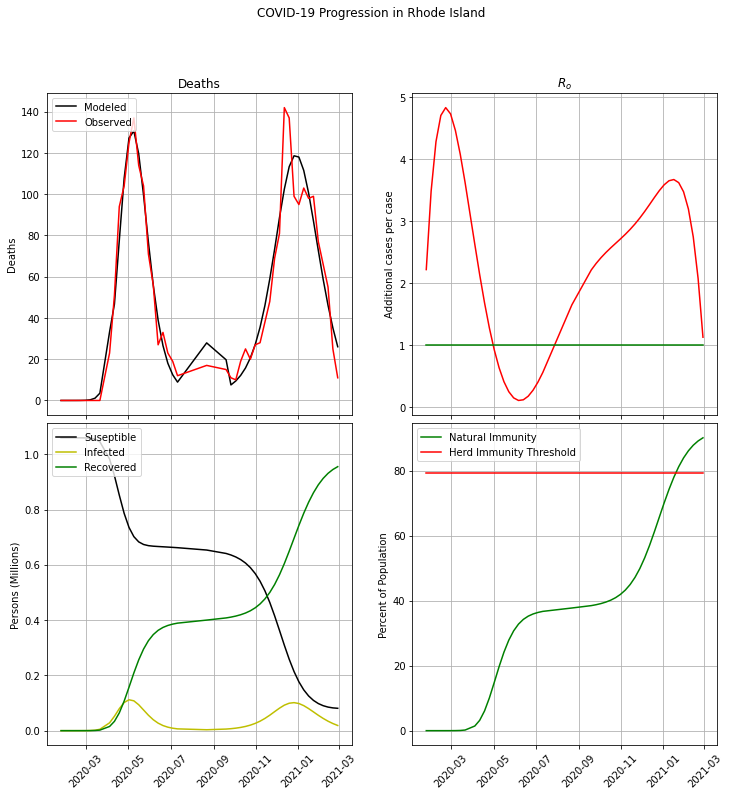

In [24]:
# Investigate the outliers

from SEIR import *
%matplotlib inline
seir = SEIR_class()
seir.plot_location("Rhode Island")

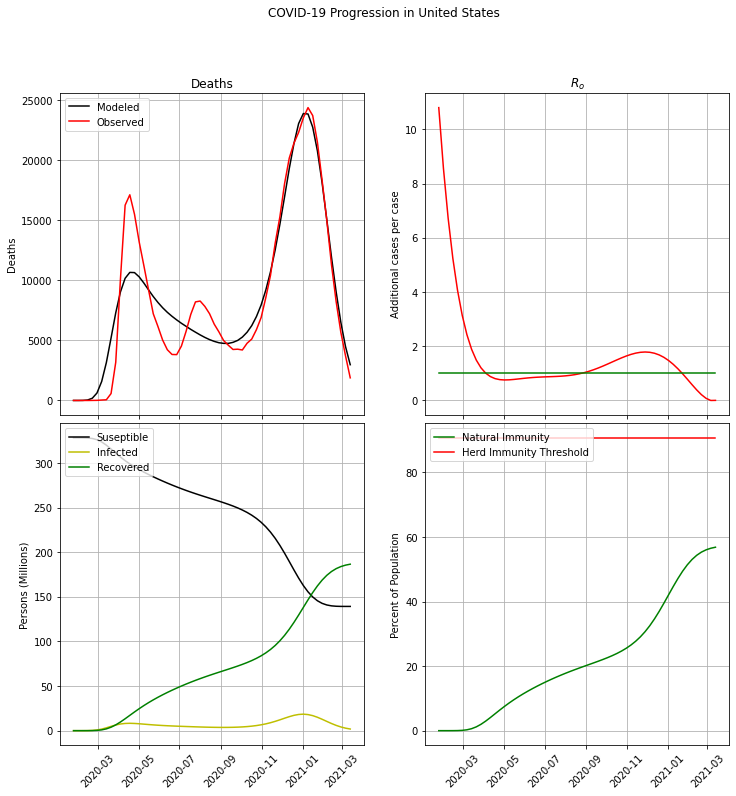

In [25]:
seir.plot_location("United States")